# Вступ до компʼютерного зору з Deep Learning

[Комп'ютерний зір (Computer Vision)](https://en.wikipedia.org/wiki/Computer_vision) - це мистецтво навчання комп'ютера бачити.

Наприклад, це може включати побудову моделі для класифікації, чи є фото котом чи собакою ([бінарна класифікація](https://developers.google.com/machine-learning/glossary#binary-classification)).

Або чи є фото котом, собакою чи куркою ([мультикласова класифікація](https://developers.google.com/machine-learning/glossary#multi-class-classification)).

Або визначення, де автомобіль з'являється у кадрі відео ([виявлення об'єктів](https://en.wikipedia.org/wiki/Object_detection)).

Або з'ясування, де різні об'єкти на зображенні можуть бути розділені ([паноптична сегментація](https://arxiv.org/abs/1801.00868)).

![приклади проблем комп'ютерного зоріння](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-problems.png)
*Приклади проблем комп'ютерного зоріння для бінарної класифікації, мультикласової класифікації, детекції об'єктів та сегментації.*

## Де використовується комп'ютерний зір?

Якщо ви користуєтеся смартфоном, ви вже використовували комп'ютерне зору.

Камери та фото-додатки використовують [комп'ютерне зору для покращення](https://machinelearning.apple.com/research/panoptic-segmentation) та сортування зображень.

Сучасні автомобілі використовують [комп'ютерне зору](https://youtu.be/j0z4FweCy4M?t=2989) для уникнення інших автомобілів та дотримання смуг руху.

Виробники використовують комп'ютерне зору для виявлення дефектів у різних продуктах.

Системи відеоспостереження використовують комп'ютерне зору для виявлення потенційних зловмисників.

По суті, все, що можна описати візуально, може бути потенційною проблемою комп'ютерного зору.

## Що ми будемо розглядати

Ми застосуємо робочий процес PyTorch, який ми вивчали в останніх кількох розділах, до комп'ютерного зору. При цьому познайомимось з деякими додатковими PyTorch інструментами та дізнаємось, як користуватись GPU для CV-задач.

![робочий процес PyTorch з акцентом на комп'ютерний зір](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-pytorch-computer-vision-workflow.png)

Конкретно, ми розглянемо:

| **Тема** | **Зміст** |
| ----- | ----- |
| **0. Бібліотеки комп'ютерного зору в PyTorch** | PyTorch має кілька вбудованих корисних бібліотек комп'ютерного зору, дізнаємось, що взагалі є. |
| **1. Завантаження даних** | Щоб практикувати комп'ютерний зір, ми почнемо з зображень різних предметів одягу з [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). |
| **2. Підготовка даних** | У нас є кілька зображень, давайте завантажимо їх за допомогою [PyTorch `DataLoader`](https://pytorch.org/docs/stable/data.html), щоб ми могли використовувати їх у нашому циклі навчання. |
| **3. Модель 0: Створення базової моделі** | Тут ми створимо модель багатокласової класифікації, щоб вивчити патерни в даних, ми також виберемо **функцію втрат**, **оптимізатор** і побудуємо **цикл навчання**. |
| **4. Прогнозування та оцінка моделі 0** | Далі зробимо кілька прогнозів за допомогою нашої базової моделі та оцінемо їх. |
| **5. Налаштування коду, незалежного від пристрою, для майбутніх моделей** | Найкраща практика - писати код, незалежний від пристрою, тож тут ми це забезпечимо. |
| **6. Модель 1: Додавання нелінійності** | Експериментування є великою частиною машинного навчання, і ми спробуємо покращити нашу базову модель, додавши нелінійні шари. |
| **7. Модель 2: Згорткова нейронна мережа (CNN)** | Час зосередитися на комп'ютерному зорі та представити потужну архітектуру згорткової нейронної мережі. |
| **8. Порівняння наших моделей** | Ми побудували три різні моделі, час їх порівняти. |
| **9. Оцінка нашої найкращої моделі** | Зробимо кілька прогнозів на випадкових зображеннях і оцінемо нашу найкращу модель. |
| **10. Створення матриці плутанини** | Матриця плутанини - це чудовий спосіб оцінити модель класифікації, подивимося, як ми можемо її створити. |
| **11. Збереження та завантаження найкращої моделі** | Оскільки ми можемо захотіти використовувати нашу модель пізніше, ми її збережемо і переконаємося, що вона правильно завантажується. |

## 0. Бібліотеки комп'ютерного зору в PyTorch

Перш ніж почати писати код, давайте поговоримо про деякі бібліотеки комп'ютерного зору в PyTorch, про які вам слід знати.

| Модуль PyTorch | Що він робить? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Містить набори даних, архітектури моделей та перетворення зображень, які часто використовуються для задач комп'ютерного зору. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Тут ви знайдете багато прикладів наборів даних комп'ютерного зору для різних задач, таких як класифікація зображень, виявлення об'єктів, підписування зображень, класифікація відео та інше. Також містить [серію базових класів для створення власних наборів даних](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | Цей модуль містить архітектури моделей комп'ютерного зору, які добре працюють і часто використовуються, реалізовані в PyTorch, ви можете використовувати їх для своїх задач. |
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Часто зображення потрібно перетворити (перетворити в числа/обробити/збільшити) перед використанням з моделлю, тут ви знайдете поширені перетворення зображень. |
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Базовий клас для оперування набором даних для PyTorch. |
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Створює ітератор Python над набором даних (створеним за допомогою `torch.utils.data.Dataset`). |

> **Примітка:** Класи `torch.utils.data.Dataset` та `torch.utils.data.DataLoader` не призначені лише для комп'ютерного зору в PyTorch, вони здатні працювати з багатьма різними типами даних, як ми вже бачили в попередніх лекціях.

Тепер, коли ми розглянули деякі з найважливіших бібліотек комп'ютерного зору в PyTorch, давайте імпортуємо відповідні залежності.

In [1]:
# Імпортуємо PyTorch
import torch
from torch import nn

# Імпортуємо torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Імпортуємо matplotlib для візуалізації
import matplotlib.pyplot as plt

# Перевіряємо версії
# Примітка: ваша версія PyTorch не повинна бути нижчою за 1.10.0, а версія torchvision не повинна бути нижчою за 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.7.0
torchvision version: 0.22.0


## 1. Отримання набору даних

Щоб почати працювати над проблемою комп'ютерного зору, давайте отримаємо набір даних для комп'ютерного зору.

Ми почнемо з FashionMNIST.

MNIST означає Модифікований Національний Інститут Стандартів і Технологій.

[Оригінальний набір даних MNIST](https://en.wikipedia.org/wiki/MNIST_database) містить тисячі прикладів рукописних цифр (від 0 до 9) і використовувався для створення моделей комп'ютерного зору для ідентифікації чисел для поштових служб.

[FashionMNIST](https://github.com/zalandoresearch/fashion-mnist), створений дослідницькою групою Zalando, має подібну структуру.

Однак він містить чорно-білі зображення 10 різних видів одягу.

![приклад зображення FashionMNIST](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-fashion-mnist-slide.png)
*`torchvision.datasets` містить багато прикладів наборів даних, які ви можете використовувати для практики написання коду комп'ютерного зору. FashionMNIST є одним з цих наборів даних. І оскільки він має 10 різних класів зображень (різні типи одягу), це проблема багатокласової класифікації.*

Пізніше ми будемо створювати нейронну мережу комп'ютерного зору для ідентифікації різних стилів одягу на цих зображеннях.

PyTorch має безліч загальних наборів даних комп'ютерного зору, збережених у `torchvision.datasets`.

Включаючи FashionMNIST у [`torchvision.datasets.FashionMNIST()`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html).

Щоб завантажити його, ми надаємо такі параметри:
* `root: str` - в яку папку ви хочете завантажити дані?
* `train: Bool` - ви хочете навчальну чи тестову частину?
* `download: Bool` - чи потрібно завантажити дані?
* `transform: torchvision.transforms` - які перетворення ви хочете виконати над даними?
* `target_transform` - ви також можете перетворити цілі (мітки), якщо хочете. Наприклад, виконати One Hot Encoding міток, чи змінити діапазон міток з 0 до 9 на 0-1, або перетворити на тензори, якщо вони зараз ними не є.

Багато інших наборів даних у `torchvision` мають ці параметри.

In [2]:
# Налаштування навчальних даних
train_data = datasets.FashionMNIST(
    root="data", # куди завантажити дані?
    train=True, # отримати навчальні дані
    download=True, # завантажити дані, якщо їх немає на диску
    transform=ToTensor(), # зображення приходять у форматі PIL, ми хочемо перетворити їх на тензори Torch
    target_transform=None # ви також можете перетворити мітки
)

# Налаштування тестових даних
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # отримати тестові дані
    download=True,
    transform=ToTensor()
)

100.0%
100.0%
100.0%
100.0%


Давайте переглянемо перший зразок навчальних даних.

In [3]:
len(train_data[0])

2

In [4]:
# Переглянути перший навчальний зразок
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

### 1.1 Вхідні та вихідні форми моделі комп'ютерного зору

У нас є великий тензор значень (зображення), що ми маємо перетворити на єдине значення мітки.

Давайте подивимося на форму зображення.

In [5]:
# Яка форма зображення?
image.shape

torch.Size([1, 28, 28])

Форма тензора зображення є `[1, 28, 28]` або, більш конкретно:


[color_channels=1, height=28, width=28]


Наявність `color_channels=1` означає, що зображення є чорно-білим.

![приклад форм вхідних і вихідних даних проблеми fashionMNIST](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-input-and-output-shapes.png)
*Різні проблеми матимуть різні форми вхідних і вихідних даних. Але принцип роботи з ML-задачею залишається: кодувати дані в числа, створити модель для виявлення патернів у цих числах, перетворити ці патерни на щось значуще - результат роботи моделі.*

Якщо `color_channels=3`, зображення містить значення пікселів для червоного, зеленого та синього (це також відомо як [RGB колірна модель](https://en.wikipedia.org/wiki/RGB_color_model)).

Порядок нашого поточного тензора часто називають `CHW` (Кольорові канали, Висота, Ширина - Channel, Height, Width).

Існує дискусія про те, чи слід зображення представляти як `CHW` (канали кольору спочатку) або `HWC` (канали кольору в кінці).

> **Примітка:** Ви також можете зустріти формати `NCHW` та `NHWC`, де `N` означає *кількість зображень*. Наприклад, якщо у вас `batch_size=32`, форма вашого тензора може бути `[32, 1, 28, 28]`. Ми розглянемо розміри пакетів пізніше.

PyTorch зазвичай приймає `NCHW` (канали спочатку) як стандарт для багатьох операторів.

Однак PyTorch також пояснює, що `NHWC` (канали в кінці) працює краще і [вважається кращою практикою](https://pytorch.org/blog/tensor-memory-format-matters/#pytorch-best-practice).

На даний момент, оскільки наш набір даних і моделі відносно малі, це не матиме великого значення.

Але майте це на увазі, коли ви працюєте з більшими наборами зображень і використовуєте згорткові нейронні мережі (ми побачимо їх пізніше).

Давайте перевіримо більше форм наших даних.

In [6]:
# Скільки зразків є?
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

Отже, у нас є 60 000 навчальних зразків і 10 000 тестових зразків.

Які класи існують?

Ми можемо знайти їх за допомогою атрибута `.classes`.

In [7]:
# Переглянути класи
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Супер! Схоже, що ми маємо справу з 10 різними видами одягу.

Оскільки ми працюємо з 10 різними класами, це означає, що наша проблема є **мультикласовою класифікацією**.

Давайте візуалізуємо.

### 1.2 Візуалізація наших даних

Image shape: torch.Size([1, 28, 28])


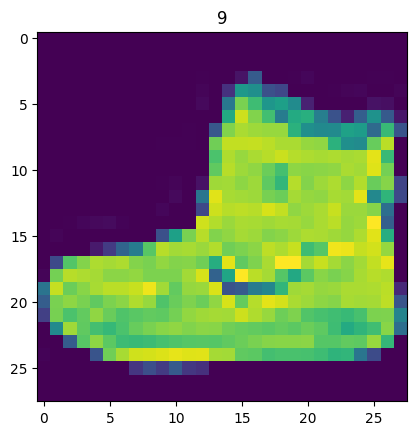

In [8]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # форма зображення - [1, 28, 28] (кольорові канали, висота, ширина)
plt.title(label);

Ми можемо перетворити зображення в градації сірого, використовуючи параметр `cmap` функції `plt.imshow()`.

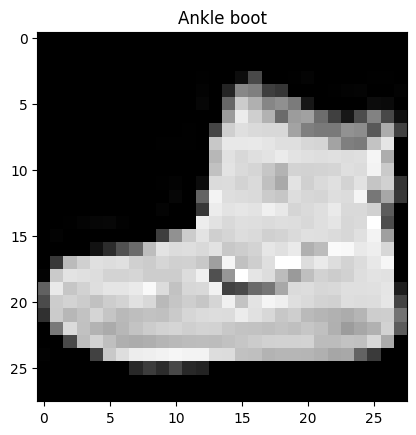

In [9]:
plt.imshow(image.squeeze(), cmap="gray")  # Відображення зображення в градаціях сірого
plt.title(class_names[label]);  # Встановлення заголовка з назвою класу

Прекрасно, настільки прекрасно, наскільки може бути піксельний сірий черевик.

Давайте подивимося ще кілька зображень.

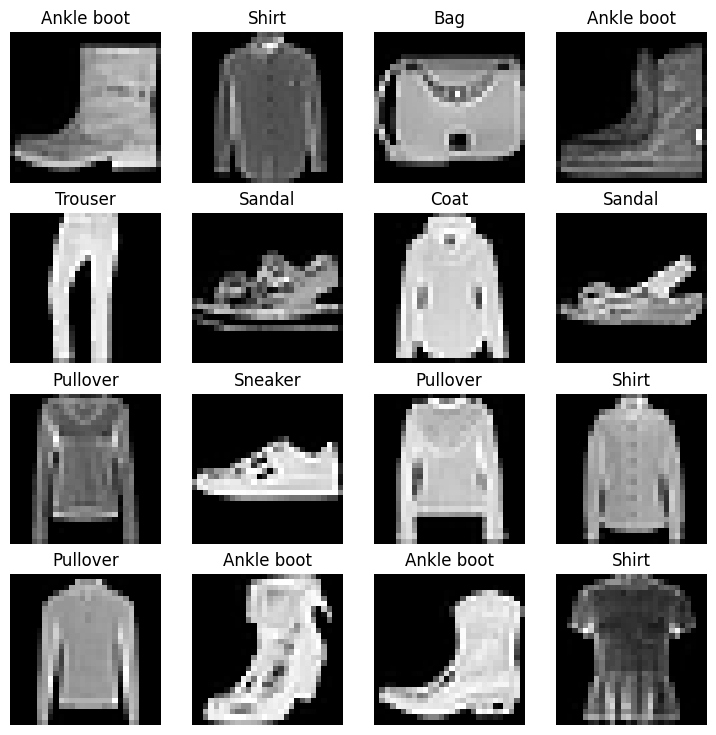

In [10]:
# Відобразити більше зображень
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

Хмм, цей набір даних не виглядає дуже естетично.

Але принципи, які ми будемо вивчати щодо побудови моделі для нього, будуть схожими для широкого спектра проблем комп'ютерного зору.

По суті, ми беремо значення пікселів і будуємо модель для виявлення патернів у них, щоб використовувати на майбутніх значеннях пікселів для передбачення класу зображення.

Крім того, навіть для цього маленького набору даних (так, навіть 60,000 зображень у глибокому навчанні вважається досить малим), чи могли б ви написати програму для класифікації кожного з них?

Я гадаю, ви б могли навіть на numpy та sklearn.
А з PyTorch і деякими CV-best practices процес буде швидшим.


## 2. Підготовка DataLoader
(і трохи пригадаємо того, що вже проходили)

Тепер у нас є готовий набір даних.

Наступний крок - підготувати його за допомогою [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset).

`DataLoader` робить те, що ви, напевно, думаєте.

Він допомагає завантажувати дані в модель.

Для навчання та для інференсу.

Він перетворює великий `Dataset` на ітерабельний об'єкт Python з меншими частинами.

Ці менші частини називаються **batch** або **mini-batch** і можуть бути встановлені за допомогою параметра `batch_size`.

**Навіщо це робити?**

Тому що це більш обчислювально ефективно.

В ідеальному світі ви могли б виконати прямий і зворотний проходи по всіх ваших даних одночасно (Full Batch).

Але як тільки ви починаєте використовувати дійсно великі набори даних, якщо у вас немає безмежної обчислювальної потужності, легше розбити їх на батчі.

Це також дає вашій моделі більше можливостей для покращення.

З **міні-пакетами** (малими частинами даних) градієнтний спуск виконується частіше за епоху (один раз за міні-батч, а не один раз за епоху). Відповідно ми частіше оновлюємо ваги і швидше вчиться модель.

Який хороший розмір батча?

[32 - це хороший варіант для початку](https://twitter.com/ylecun/status/989610208497360896?s=20&t=N96J_jotN--PYuJk2WcjMw) для багатьох задач.

Але оскільки це - значення, яке ви можете встановити перед стартом навчання моделі (тобто **гіперпараметр**), ви можете спробувати всі різні значення, хоча зазвичай використовуються степені 2 (наприклад, 32, 64, 128, 256, 512) бо так буде ліпше працювати на GPU.

![приклад того, як виглядає пакетований набір даних](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-batching-fashionmnist.png)
*Пакетування FashionMNIST з розміром батча 32 та увімкненим перемішуванням. Подібний процес пакетування відбудеться для інших наборів даних, але буде відрізнятися в залежності від розміру пакета.*

Давайте створимо `DataLoader` для наших навчальних та тестових наборів.

In [11]:
from torch.utils.data import DataLoader

# Налаштування гіперпараметра розміру партії
BATCH_SIZE = 32

# Перетворення наборів даних на ітерабельні (партії)
train_dataloader = DataLoader(train_data, # набір даних, який потрібно перетворити на ітерабельний
    batch_size=BATCH_SIZE, # скільки зразків на партію?
    shuffle=True # перемішувати дані на кожній епосі?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # не обов'язково перемішувати тестові дані
)

# Давайте перевіримо, що ми створили
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Довжина навчального dataloader: {len(train_dataloader)} партій по {BATCH_SIZE}")
print(f"Довжина тестового dataloader: {len(test_dataloader)} партій по {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x16052ee70>, <torch.utils.data.dataloader.DataLoader object at 0x167417470>)
Довжина навчального dataloader: 1875 партій по 32
Довжина тестового dataloader: 313 партій по 32


In [12]:
# Перевірте, що всередині навчального dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

І ми можемо побачити, що формат (розміри) даних є фіксованим, перевіривши один зразок.

Розмір зображення: torch.Size([1, 28, 28])
Мітка: 6, розмір мітки: torch.Size([])


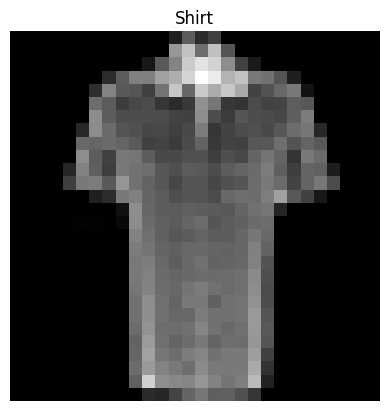

In [13]:
# Показати зразок
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Розмір зображення: {img.shape}")
print(f"Мітка: {label}, розмір мітки: {label.shape}")

## 3. Модель 0: Створення базової моделі - baseline model

Дані завантажено та підготовлено!

Час створити **базову модель**, підкласуючи `nn.Module`.

**Базова модель** є однією з найпростіших моделей, які ви можете уявити.

Ви використовуєте базову модель як відправну точку і намагаєтеся покращити її за допомогою наступних, більш складних моделей.

Наша базова модель буде складатися з двох [`nn.Linear()`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) шарів.

Ми вже робили це в попередніх уроках, але буде одна невелика різниця.

Оскільки ми працюємо з зображеннями, ми будемо використовувати інший шар, щоб почати.

І це [`nn.Flatten()`](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html) шар.

`nn.Flatten()` стискає розміри тензора в один вектор. Тобто видовжує зображення в один довгий вектор-ковбасу.

Це легше зрозуміти, коли ви це бачите.

In [14]:
# Створити шар сплющення
flatten_model = nn.Flatten() # всі модулі nn функціонують як модель (можна виконати прямий прохід)

# Отримати один зразок
x = train_features_batch[0]

# Сплющити зразок
output = flatten_model(x) # виконати прямий прохід

# Вивести на екран, що сталося
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")


Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [15]:
# Спробуйте розкоментувати нижче і подивіться, що станеться
# print(x)
# print(output)

Шар `nn.Flatten()` змінив нашу форму з `[color_channels, height, width]` на `[color_channels, height*width]`.

**Навіщо це робити?**

Таким чином ми перетворили наші піксельні дані з вимірів висоти та ширини в один довгий **вектор ознак**.

А шари `nn.Linear()` вважають за краще, щоб їхні вхідні дані були у формі векторів ознак.

Давайте створимо нашу першу модель, використовуючи `nn.Flatten()` як перший шар.

In [16]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # нейронні мережі люблять, коли їхні вхідні дані у векторній формі
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = кількість ознак у зразку даних (784 пікселі)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

Чудово!

У нас є базовий клас моделі, який ми можемо використовувати, тепер давайте створимо екземпляр моделі.

Нам потрібно встановити такі параметри:
* `input_shape=784` - це кількість ознак, які ви вводите в модель, у нашому випадку це одна для кожного пікселя в цільовому зображенні (28 пікселів заввишки на 28 пікселів завширшки = 784 ознаки).
* `hidden_units=10` - кількість одиниць/нейронів у прихованому шарі(ах), це число може бути будь-яким, але щоб зберегти модель компактною, ми почнемо з `10`.
* `output_shape=len(class_names)` - оскільки ми працюємо з проблемою багатокласової класифікації, нам потрібен вихідний нейрон для кожного класу в нашому наборі даних.

Давайте створимо екземпляр нашої моделі і надішлемо його на ЦП поки що (ми скоро проведемо невеликий тест для запуску `model_0` на ЦП проти подібної моделі на ГП).

In [17]:
torch.manual_seed(42)

# Потрібно налаштувати модель з вхідними параметрами
model_0 = FashionMNISTModelV0(input_shape=784, # один для кожного пікселя (28x28)
    hidden_units=10, # скільки одиниць у прихованому шарі
    output_shape=len(class_names) # один для кожного класу
)
model_0.to("cpu") # тримати модель на ЦП на початку

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

### 3.1 Налаштування cost function, оптимізатора та метрик оцінки

Нам потрібні деякі допоміжні функції, які знайдемо в [`helper_functions.py` скрипт](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py) і відповідно функцію `accuracy_fn()`

> **Примітка:** Замість того, щоб імпортувати та використовувати нашу власну функцію точності або метрики оцінки, ви можете імпортувати різні метрики оцінки з пакету [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).

In [18]:
# Імпорт метрики точності
from helper_functions import accuracy_fn # Примітка: також можна використовувати torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Налаштування функції втрат та оптимізатора
loss_fn = nn.CrossEntropyLoss() # це також називається "критерієм"/"функцією витрат" в деяких місцях
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### 3.2 Створення функції для вимірювання часу наших експериментів

Функція втрат і оптимізатор готові!

Час почати навчання моделі.

Але як щодо того, щоб провести невеличкий експеримент під час навчання.

Я маю на увазі, давайте створимо функцію для вимірювання часу, щоб визначити, скільки часу нашій моделі потрібно для навчання на ЦПУ в порівнянні з використанням ГПУ.

Ми навчимо цю модель на ЦПУ, а наступну - на ГПУ і подивимося, що станеться.

Наша функція вимірювання часу імплементує [`timeit.default_timer()` функцію](https://docs.python.org/3/library/timeit.html#timeit.default_timer) з Python [`timeit` модуля](https://docs.python.org/3/library/timeit.html).

In [19]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Виводить різницю між початковим і кінцевим часом.

    Args:
        start (float): Початковий час обчислення (бажано у форматі timeit).
        end (float): Кінцевий час обчислення.
        device ([type], optional): Пристрій, на якому виконується обчислення. За замовчуванням None.

    Returns:
        float: час між початком і кінцем у секундах (більше - довше).
    """
    total_time = end - start
    print(f"Час навчання на {device}: {total_time:.3f} секунд")
    return total_time

### 3.3 Створення циклу навчання та навчання моделі на пакетах даних

Чудово!

Схоже, що у нас є всі частини головоломки готові до роботи: таймер, функція втрат, оптимізатор, модель і, що найважливіше, деякі дані.

Тепер давайте створимо цикл навчання та цикл тестування, щоб навчити та оцінити нашу модель.

Наші пакети даних містяться в наших `DataLoader`s, `train_dataloader` та `test_dataloader` для навчальних та тестових розподілів відповідно.

Пакет - це `BATCH_SIZE` зразків `X` (ознаки) та `y` (мітки), оскільки ми використовуємо `BATCH_SIZE=32`, наші пакети містять 32 зразки зображень та цілей.

І оскільки ми обчислюємо на пакетах даних, наші значення втрат і метрики оцінки будуть розраховані **на пакет** замість по всьому набору даних.

Це означає, що нам потрібно буде поділити наші значення втрат і точності на кількість пакетів у відповідному завантажувачі даних кожного набору.

Алгоритм виглядає наступним чином:
1. Проходимо через епохи.
2. Проходимо через навчальні пакети, виконуємо кроки навчання, розраховуємо втрати навчання *на пакет*.
3. Проходимо через тестові пакети, виконуйте кроки тестування, розраховуємо втрати тестування *на пакет*.
4. Виводимо на екран, що відбувається.
5. Вимірюємо час (для розваги).


In [20]:
# Імпортуємо tqdm для індикатора прогресу
from tqdm.auto import tqdm

# Встановлюємо початкове значення та запускаємо таймер
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Встановлюємо кількість епох (збережемо це малим для швидшого часу навчання)
epochs = 3

# Створюємо цикл навчання та тестування
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Навчання
    train_loss = 0
    # Додаємо цикл для проходження через навчальні пакети
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Прямий прохід
        y_pred = model_0(X)

        # 2. Обчислюємо втрати (за пакет)
        loss = loss_fn(y_pred, y)
        train_loss += loss # накопичуємо втрати за епоху

        # 3. Обнуляємо градієнти оптимізатора
        optimizer.zero_grad()

        # 4. Зворотний прохід втрат
        loss.backward()

        # 5. Крок оптимізатора
        optimizer.step()

        # Виводимо, скільки зразків було оброблено
        if batch % 400 == 0:
            print(f"Подивилися на {batch * len(X)}/{len(train_dataloader.dataset)} зразків")

    # Ділимо загальні втрати навчання на довжину навчального датасету (середні втрати за пакет за епоху)
    train_loss /= len(train_dataloader)

    ### Тестування
    # Налаштовуємо змінні для накопичення втрат та точності
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Прямий прохід
            test_pred = model_0(X)

            # 2. Обчислюємо втрати (накопичувально)
            test_loss += loss_fn(test_pred, y) # накопичуємо втрати за епоху

            # 3. Обчислюємо точність (прогнози повинні збігатися з y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Обчислення тестових метрик повинні відбуватися всередині torch.inference_mode()
        # Ділимо загальні тестові втрати на довжину тестового датасету (за пакет)
        test_loss /= len(test_dataloader)

        # Ділимо загальну точність на довжину тестового датасету (за пакет)
        test_acc /= len(test_dataloader)

    ## Виводимо, що відбувається
    print(f"\nВтрати навчання: {train_loss:.5f} | Втрати тестування: {test_loss:.5f}, Точність тестування: {test_acc:.2f}%\n")

# Обчислюємо час навчання
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

ModuleNotFoundError: No module named 'tqdm'

Гарно! Схоже, що наша базова модель показала досить хороші результати.

Це не зайняло багато часу для навчання, навіть лише на CPU, цікаво, чи прискориться вона на GPU?

Давайте напишемо код для оцінки нашої моделі.

## 4. Отримаємо прогнози та оцінку якості Моделі 0

Оскільки ми будемо створювати кілька моделей, хорошою ідеєю буде написати код для оцінки їх усіх подібними способами.

А саме, давайте створимо функцію, яка приймає навчану модель, `DataLoader`, функцію втрат та функцію точності.

Функція використовуватиме модель для створення прогнозів на даних у `DataLoader`, а потім ми зможемо оцінити ці прогнози, використовуючи функцію втрат і функцію точності.

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Повертає словник, що містить результати прогнозування моделі на data_loader.

    Args:
        model (torch.nn.Module): Модель PyTorch, здатна робити прогнози на data_loader.
        data_loader (torch.utils.data.DataLoader): Цільовий набір даних для прогнозування.
        loss_fn (torch.nn.Module): Функція втрат моделі.
        accuracy_fn: Функція точності для порівняння прогнозів моделі з істинними мітками.

    Returns:
        (dict): Результати прогнозування моделі на data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Зробіть прогнози за допомогою моделі
            y_pred = model(X)

            # Накопичте значення втрат і точності за кожну партію
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # Для точності потрібні мітки прогнозів (логіти -> пред_ймовірності -> пред_мітки)

        # Масштабуйте втрати та точність, щоб знайти середні втрати/точність за партію
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # працює лише коли модель була створена з класом
            "model_loss": loss.item(),
            "model_acc": acc}

# Обчисліть результати моделі 0 на тестовому наборі даних
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

Виглядає добре!

Ми можемо використовувати цей словник, щоб порівняти результати базової моделі з іншими моделями пізніше.

## 5. Налаштування коду, що не залежить від пристрою (для використання GPU, якщо він доступний)
Ми бачили, скільки часу займає навчання нашої моделі PyTorch на 60,000 зразках на CPU.

> **Примітка:** Час навчання моделі залежить від використовуваного апаратного забезпечення. Як правило, більше процесорів означає швидше навчання, а менші моделі на менших наборах даних часто навчаються швидше, ніж великі моделі та великі набори даних.

Тепер давайте налаштуємо деякий [код, незалежний від пристрою](https://pytorch.org/docs/stable/notes/cuda.html#best-practices) для наших моделей і даних, щоб вони могли працювати на GPU, якщо він доступний.

Якщо ви запускаєте цей блокнот на Google Colab і у вас ще не увімкнено GPU, зараз час увімкнути його через `Runtime -> Change runtime type -> Hardware accelerator -> GPU`. Якщо ви це зробите, ваш сеанс, ймовірно, скине, і вам доведеться запустити всі клітини вище, перейшовши до `Runtime -> Run before`.

In [ ]:
# Налаштування коду, незалежного від пристрою
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Чудово!

Давайте побудуємо ще одну модель.

## 6. Модель 1: Створення кращої моделі з нелінійністю

Раніше ми вже обговорювали, що в нейромережах важлива нелінійність, аби апроксимувати складні (нелінійні) звʼязки в даних. Тож, давайте додамо в нашу мережу нелінійність.

Ми зробимо це вставивши нелінійні функції (`nn.ReLU()`) після кожного лінійного шару.

In [ ]:
# Створіть модель з нелінійними та лінійними шарами
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # перетворення вхідних даних в один вектор
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

Тепер давайте створимо модель з тими ж налаштуваннями, які ми використовували раніше.

Нам потрібно `input_shape=784` (дорівнює кількості ознак наших зображень), `hidden_units=10` (починаємо з малого, так само як у нашій базовій моделі) і `output_shape=len(class_names)` (одиниця виходу на кожен клас).

> **Примітка:** Зверніть увагу, що ми зберегли більшість налаштувань нашої моделі незмінними, за винятком однієї зміни: додавання нелінійних шарів. Це стандартна практика для проведення серії експериментів з машинним навчанням: змініть одну річ і подивіться, що станеться, потім зробіть це знову, знову, знову.

In [ ]:
device

'cuda'

In [ ]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # кількість вхідних ознак
    hidden_units=10,
    output_shape=len(class_names) # кількість бажаних вихідних класів
).to(device) # відправити модель на GPU, якщо він доступний
next(model_1.parameters()).device # перевірити пристрій моделі

device(type='cuda', index=0)

### 6.1 Налаштування функції втрат, оптимізатора та метрик оцінки

Як зазвичай, ми налаштуємо функцію втрат, оптимізатор та метрику оцінки (ми могли б використовувати кілька метрик оцінки, але наразі зупинимося на точності).

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()  # Функція втрат
optimizer = torch.optim.SGD(params=model_1.parameters(),  # Оптимізатор
                            lr=0.1)  # Швидкість навчання

### 6.2 Функціоналізація циклів навчання та тестування

Досі ми постійно писали цикли навчання та тестування.

Давайте напишемо їх знову, але цього разу помістимо їх у функції, щоб їх можна було викликати знову і знову.

І оскільки ми зараз використовуємо код, незалежний від пристрою, ми обов'язково викличемо `.to(device)` для наших тензорів ознак (`X`) та цілей (`y`).

Для циклу навчання ми створимо функцію під назвою `train_step()`, яка приймає модель, `DataLoader`, функцію втрат та оптимізатор.

Цикл тестування буде подібним, але він буде називатися `test_step()` і прийматиме модель, `DataLoader`, функцію втрат та функцію оцінки.

> **Примітка:** Оскільки це функції, ви можете налаштувати їх будь-яким способом, який вам подобається. Те, що ми створюємо тут, можна вважати базовими функціями навчання та тестування для нашого конкретного випадку класифікації.

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Відправка даних на GPU
        X, y = X.to(device), y.to(device)

        # 1. Прямий прохід
        y_pred = model(X)

        # 2. Обчислення втрат
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Перехід від логітів до предсказаних міток

        # 3. Обнулення градієнтів оптимізатора
        optimizer.zero_grad()

        # 4. Зворотний прохід втрат
        loss.backward()

        # 5. Крок оптимізатора
        optimizer.step()

    # Обчислення втрат і точності за епоху та виведення результатів
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # перевести модель в режим оцінки
    # Увімкнути контекстний менеджер для інференції
    with torch.inference_mode():
        for X, y in data_loader:
            # Відправка даних на GPU
            X, y = X.to(device), y.to(device)

            # 1. Прямий прохід
            test_pred = model(X)

            # 2. Обчислення втрат і точності
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Перехід від логітів до предсказаних міток
            )

        # Коригування метрик і виведення результатів
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")


Ура!

Тепер у нас є кілька функцій для навчання та тестування нашої моделі, давайте їх запустимо.

Ми зробимо це в іншому циклі для кожної епохи.

Таким чином, для кожної епохи ми проходимо через крок навчання та крок тестування.

> **Примітка:** Ви можете налаштувати, як часто ви будете виконувати крок тестування. Іноді люди роблять це кожні п'ять епох або 10 епох, або в нашому випадку, кожну епоху.

Давайте також виміряємо час, щоб дізнатися, скільки часу наш код витрачає на виконання на GPU.

In [ ]:
torch.manual_seed(42)

# Вимірювання часу
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Епоха: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Епоха: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Епоха: 1
---------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Епоха: 2
---------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Час навчання на cuda: 31.105 секунд


Чудово!

Наша модель навчилася, але час навчання зайняв більше часу?

> **Примітка:** Час навчання на CUDA в порівнянні з CPU значною мірою залежатиме від якості вашого CPU/GPU. Як так?
>
> **Запитання:** "Я використовував GPU, але моя модель не навчалася швидше, чому це може бути?"
>
> **Відповідь:** Одна з причин може бути в тому, що ваш набір даних і модель настільки малі (як набір даних і модель, з якими ми працюємо), що переваги використання GPU переважуються часом, який насправді потрібно для передачі даних туди.
>
> Є невелике вузьке місце між копіюванням даних з пам'яті CPU (за замовчуванням) в пам'ять GPU.
>
> Тому для менших моделей і наборів даних CPU може насправді бути оптимальним місцем для обчислень.
>
> Але для більших наборів даних і моделей швидкість обчислень на GPU зазвичай значно перевищує витрати на передачу даних туди.
>
> Однак це в значній мірі залежить від апаратного забезпечення, яке ви використовуєте. З практикою ви звикнете до того, де найкраще навчати ваші моделі.

Давайте оцінемо нашу навчена `model_1` за допомогою нашої функції `eval_model()` і подивимося, як це пройшло.

In [ ]:
torch.manual_seed(42)

# Примітка: Це викличе помилку через те, що `eval_model()` не використовує код, незалежний від пристрою
model_1_results = eval_model(model=model_1,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn)
model_1_results

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

Отакої!

Схоже, що наша функція `eval_model()` викликає помилку з:

> `RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_addmm)`

Це сталося тому, що ми налаштували наші дані та модель для використання коду, незалежного від пристрою, але не нашу функцію оцінки.

Як щодо того, щоб виправити це, передавши параметр `device` у нашу функцію `eval_model()`?

Тоді ми спробуємо знову обчислити результати.

In [ ]:
# Перемістіть значення на пристрій
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Оцінює задану модель на заданому наборі даних.

    Args:
        model (torch.nn.Module): Модель PyTorch, здатна робити прогнози на data_loader.
        data_loader (torch.utils.data.DataLoader): Цільовий набір даних для прогнозування.
        loss_fn (torch.nn.Module): Функція втрат моделі.
        accuracy_fn: Функція точності для порівняння прогнозів моделі з істинними мітками.
        device (str, optional): Цільовий пристрій для обчислень. За замовчуванням - device.

    Returns:
        (dict): Результати прогнозування моделі на data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Надішліть дані на цільовий пристрій
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Масштабування втрат і точності
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # працює лише коли модель була створена з класом
            "model_loss": loss.item(),
            "model_acc": acc}

# Обчисліть результати моделі 1 з кодом, незалежним від пристрою
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [ ]:
# Перевірка базових результатів
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

Ого, у цьому випадку, здається, що додавання нелінійностей до нашої моделі призвело до гірших результатів, ніж базова модель.

Це варто зазначити в машинному навчанні: іноді те, що ви думали, що має спрацювати, не спрацьовує.

А те, що ви думали, що може не спрацювати, спрацьовує.

Це частково наука, частково мистецтво.

Судячи з усього, наша модель, здається, **перенавчається** на навчальних даних.

Перенавчання означає, що наша модель добре вивчає навчальні дані, але ці патерни не узагальнюються на тестові дані.

Два основні способи виправити перенавчання включають:
1. Використання меншої або іншої моделі (деякі моделі краще підходять для певних типів даних).
2. Використання більшого набору даних (чим більше даних, тим більше шансів у моделі навчитися узагальнювальним патернам).

Є й інші способи, але я залишу це як виклик для вас, щоб дослідити.

Спробуйте пошукати в Інтернеті "способи запобігання перенавчанню в машинному навчанні" і подивіться, що знайдете.

А поки давайте розглянемо номер 1: використання іншої моделі.

## 7. Модель 2: Створення згорткової нейронної мережі (CNN)

Добре, час підняти ставки.

Час створити [згорткову нейронну мережу](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN або ConvNet).

CNN відомі своїми можливостями знаходити патерни у візуальних даних.

І оскільки ми маємо справу з візуальними даними, давайте подивимося, чи може використання моделі CNN покращити наш базовий рівень.

Модель CNN, яку ми будемо використовувати, відома як TinyVGG з веб-сайту [CNN Explainer](https://poloclub.github.io/cnn-explainer/).

Вона слідує типовій структурі згорткової нейронної мережі:

`Вхідний шар -> [Згортковий шар -> шар активації -> шар підбору] -> Вихідний шар`

Де вміст `[Згортковий шар -> шар активації -> шар підбору]` може бути масштабований і повторюваний кілька разів, залежно від вимог.

### Яку модель мені слід використовувати?

> **Запитання:** Зачекайте, ви кажете, що CNN хороші для зображень, чи є інші типи моделей, про які мені слід знати?

Добре запитання.

Ця таблиця є хорошим загальним посібником для вибору моделі (хоча є й винятки).

| **Тип проблеми** | **Модель для використання (загалом)** | **Приклад коду** |
| ----- | ----- | ----- |
| Структуровані дані (Excel таблиці, дані в рядках і стовпцях) | Моделі з градієнтним підсиленням, Випадкові ліси, XGBoost | [`sklearn.ensemble`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble), [бібліотека XGBoost](https://xgboost.readthedocs.io/en/stable/) |
| Неструктуровані дані (зображення, аудіо, мова) | Згорткові нейронні мережі, Трансформери | [`torchvision.models`](https://pytorch.org/vision/stable/models.html), [HuggingFace Transformers](https://huggingface.co/docs/transformers/index) |

> **Примітка:** Таблиця вище є лише для довідки, модель, яку ви в кінцевому підсумку використовуватимете, буде сильно залежати від проблеми, над якою ви працюєте, та обмежень, які у вас є (кількість даних, вимоги до затримки).

Давайте тепер побудуємо CNN, яка відтворює модель на [вебсайті CNN Explainer](https://poloclub.github.io/cnn-explainer/).

![Архітектура TinyVGG, налаштована вебсайтом CNN explainer](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-cnn-explainer-model.png)

Для цього ми скористаємося шарами [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) та [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) з `torch.nn`.

In [ ]:
# Створення згорткової нейронної мережі
class FashionMNISTModelV2(nn.Module):
    """
    Архітектура моделі, що копіює TinyVGG з:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # якого розміру квадрат, що проходить по зображенню?
                      stride=1, # за замовчуванням
                      padding=1),# варіанти = "valid" (без заповнення) або "same" (вихід має таку ж форму, як вхід) або int для конкретного числа
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # значення кроку за замовчуванням таке ж, як і розмір ядра
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Звідки взялася ця форма in_features?
            # Це тому, що кожен шар нашої мережі стискає та змінює форму наших вхідних даних.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)
model_2


FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

Гарно!

Наша найбільша модель (по кількості коду) до цього часу!

Те, що ми зробили, є звичайною практикою в машинному навчанні - знайти архітектуру моделі десь і відтворити її за допомогою коду самостійно. Це дуже класне тренування.

### 7.1 Проходження через `nn.Conv2d()`

Ми могли б почати використовувати нашу модель вище і подивитися, що станеться, але спочатку давайте розглянемо два нові шари, які ми додали:
* [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html), також відомий як згортковий шар.
* [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html), також відомий як шар Maximum Pooling.

> **Запитання:** Що означає "2d" в `nn.Conv2d()`?
>
> 2d означає 2-вимірні дані. Тобто, наші зображення мають дві розмірності: висоту і ширину. Так, є ще кольоровий канал, але ми просто розглядаємо кожен канал як одну окрему двовимірну картинку.
>
> Для даних інших розмірностей (таких як 1D для тексту або 3D для 3D об'єктів) також є `nn.Conv1d()` і `nn.Conv3d()`.

### Як працює згортковий шар?
![](https://cdn.prod.website-files.com/614c82ed388d53640613982e/646218745ba944b514f8d350_lenet%20architecture.webp)
![](https://cdn.prod.website-files.com/614c82ed388d53640613982e/6462188f86bb3724db70a0c5_convolutional%20layer.webp)
Розглянемо вхідне зображення з висотою \(H\), шириною \(W\) та \(C\) каналами (наприклад, RGB-зображення має 3 канали). У нас також є набір із \(K\) фільтрів (ядер), які ми будемо навчати, кожен фільтр з яких має свою висоту, ширину та кількість каналів. Зазвичай кількість каналів фільтра співпадає з кількістю каналів вхідного зображення, а висота і ширина фільтра значно менші за просторову роздільну здатність вхідного зображення.

### Як працює згортковий шар:
1. **Операція згортки**:
   Згортковий шар бере кожен фільтр і ковзає ним по вхідному зображенню. У кожній позиції фільтр виконує помноження елементів фільтра на відповідні значення пікселів вхідного зображення. Після цього результати множення підсумовуються, утворюючи єдине значення виходу.

2. **Еквівалентність матричному множенню**:
   Ця операція подібна до множення матриць, де вагами виступають значення фільтра. Таким чином, згортковий шар можна порівняти з повнозв’язним шаром, але із **розподіленими вагами** (weight sharing).

3. **Частково зв’язаний шар**:
   Потрібно зазначити, що пікселі вхідного зображення не повністю зв’язані з усіма вихідними значеннями, як у повнозв’язному шарі. Натомість зв’язок обмежується областю, яка покривається фільтром.

4. **Формування вихідної карти ознак**:
   Щоб отримати вихідну карту ознак, згортка виконується \(K\)-разів – один раз для кожного фільтра. Усі отримані карти ознак об’єднуються (стекуються) по глибині.

5. **Розмір вихідної карти ознак**:
   Розмір вихідної карти ознак залежить від:
   - Розміру вхідного зображення;
   - Розміру фільтра;
   - Значення кроку (stride);
   - Налаштування заповнення (padding).

### Переваги:
- Згорткові шари дозволяють зменшити кількість параметрів завдяки використанню невеликих фільтрів.
- Забезпечують локальну інваріантність, що є ключовою перевагою для аналізу зображень і сигналів.

### Розглянемо детальніше роботу зі згортковими шарами
Щоб протестувати згорткові і MaxPool шари, давайте створимо деякі іграшкові дані, як дані, використані в CNN Explainer. Вони іншої розмірності, ніж наші, бо оригінально архітектура TinyVGG була побудована під набір даних, який мав кольорові зображення розмірності 64*64.

In [ ]:
torch.manual_seed(42)

# Створити вибірку випадкових чисел з таким же розміром, як у пакеті зображень
images = torch.randn(size=(32, 3, 64, 64)) # [розмір_пакету, кольорові_канали, висота, ширина]
test_image = images[0] # отримати одне зображення для тестування
print(f"Форма пакету зображень: {images.shape} -> [розмір_пакету, кольорові_канали, висота, ширина]")
print(f"Форма одного зображення: {test_image.shape} -> [кольорові_канали, висота, ширина]")
print(f"Піксельні значення одного зображення:\n{test_image}")


Форма пакету зображень: torch.Size([32, 3, 64, 64]) -> [розмір_пакету, кольорові_канали, висота, ширина]
Форма одного зображення: torch.Size([3, 64, 64]) -> [кольорові_канали, висота, ширина]
Піксельні значення одного зображення:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0

Давайте створимо приклад `nn.Conv2d()` з різними параметрами:
* `in_channels` (int) - Кількість каналів у вхідному зображенні.
* `out_channels` (int) - Кількість каналів, що генеруються внаслідок згортки.
* `kernel_size` (int або tuple) - Розмір згорткового ядра/фільтра.
* `stride` (int або tuple, необов'язковий) - Який великий крок робить згорткове ядро за раз. За замовчуванням: 1.
* `padding` (int, tuple, str) - Доповнення, додане до всіх чотирьох сторін вхідних даних. За замовчуванням: 0.

![приклад проходження через різні параметри шару Conv2d](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv2d-layer.gif)

*Приклад того, що відбувається, коли ви змінюєте гіперпараметри шару `nn.Conv2d()`.*

In [ ]:
torch.manual_seed(42)

# Створіть згортковий шар з такими ж розмірами, як у TinyVGG
# (спробуйте змінити будь-який з параметрів і подивіться, що станеться)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) # також спробуйте використати "valid" або "same" тут

# Пропустіть дані через згортковий шар
conv_layer(test_image) # Примітка: Якщо ви використовуєте PyTorch <1.11.0, це викличе помилку через проблеми з формою (nn.Conv.2d() очікує 4d тензор на вхід)

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

Якщо ми спробуємо передати одне зображення, ми отримаємо помилку невідповідності розмірів:

> `RuntimeError: Expected 4-dimensional input for 4-dimensional weight [10, 3, 3, 3], but got 3-dimensional input of size [3, 64, 64] instead`
>
> **Примітка:** Якщо ви використовуєте PyTorch 1.11.0+, ця помилка не виникне.

Це пов'язано з тим, що наш шар `nn.Conv2d()` очікує 4-вимірний тензор на вхід з розміром `(N, C, H, W)` або `[розмір_пакету, кольорові_канали, висота, ширина]`.

Зараз наше одне зображення `test_image` має лише форму `[кольорові_канали, висота, ширина]` або `[3, 64, 64]`.

Ми можемо виправити це для одного зображення, використовуючи `test_image.unsqueeze(dim=0)`, щоб додати додатковий вимір для `N`.

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
# Додати додатковий вимір до тестового зображення
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [ ]:
# Пропустіть тестове зображення з додатковим виміром через conv_layer
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

Гм, зверніть увагу на те, що відбувається з нашою формою (та ж сама форма, що й у першому шарі TinyVGG на [CNN Explainer](https://poloclub.github.io/cnn-explainer/)), ми отримуємо різні розміри каналів, а також різні розміри пікселів.

Що буде, якщо ми змінимо значення `conv_layer`?

In [ ]:
torch.manual_seed(42)
# Створіть новий conv_layer з різними значеннями (спробуйте встановити їх на свій розсуд)
conv_layer_2 = nn.Conv2d(in_channels=3, # така ж кількість кольорових каналів, як у нашому вхідному зображенні
                         out_channels=10,
                         kernel_size=(5, 5), # ядро зазвичай квадратне, тому кортеж також підходить
                         stride=2,
                         padding=0)

# Пропустіть одне зображення через новий conv_layer_2 (це викликає метод forward() nn.Conv2d() для вхідних даних)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

Ого, у нас знову зміна форми.

Тепер наше зображення має форму `[1, 10, 30, 30]` (воно буде іншим, якщо ви використовуєте інші значення) або `[batch_size=1, color_channels=10, height=30, width=30]`.

Що тут відбувається?

За лаштунками наш `nn.Conv2d()` стискає інформацію, що зберігається в зображенні.

Це відбувається шляхом виконання операцій над вхідними даними (нашим тестовим зображенням) з його внутрішніми параметрами.

Мета цього подібна до всіх інших нейронних мереж, які ми будували.

Дані надходять, і шари намагаються оновити свої внутрішні параметри (патерни), щоб зменшити функцію втрат завдяки допомозі оптимізатора.

Єдина різниця полягає в *тому*, як різні шари обчислюють свої оновлення параметрів або, в термінах PyTorch, операція, присутня в методі `forward()` шару.

Якщо ми перевіримо наш `conv_layer_2.state_dict()`, ми знайдемо подібну налаштування ваг і зсувів, як ми бачили раніше.

In [ ]:
# Перевірте внутрішні параметри conv_layer_2
# print(conv_layer_2.state_dict())

Подивіться на це! Купа випадкових чисел для тензора ваг і зсувів.

Форми цих тензорів маніпулюються вхідними даними, які ми передали в `nn.Conv2d()`, коли налаштовували його.

Давайте їх перевіримо.

In [ ]:
# Отримати розміри тензорів ваг і зсувів у conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


> **Запитання:** Які параметри ми повинні встановити для наших шарів `nn.Conv2d()`?
>
> Це хороше питання. Але, як і багато інших речей у машинному навчанні, значення цих параметрів не є незмінними (і пам'ятайте, оскільки ці значення ми можемо встановити самі, їх називають "**гіперпараметрами**").
>
> Найкращий спосіб дізнатися - це спробувати різні значення і подивитися, як вони впливають на продуктивність вашої моделі.
>
> Або ще краще, знайдіть робочий приклад для проблеми, схожої на вашу (як ми зробили з TinyVGG), і скопіюйте його.

Ми працюємо з іншим типом шару, ніж те, що ми бачили раніше.

Але принцип залишається тим самим: почніть з випадкових чисел і оновлюйте їх, щоб краще відображати дані.

### 7.2 Проходження через `nn.MaxPool2d()`
Тепер давайте подивимося, що відбувається, коли ми пропускаємо дані через `nn.MaxPool2d()`.

In [ ]:
# Вивести оригінальну форму зображення без і з доданим виміром
print(f"Тестове зображення, оригінальна форма: {test_image.shape}")
print(f"Тестове зображення з доданим виміром: {test_image.unsqueeze(dim=0).shape}")

# Створити зразок шару nn.MaxPool2d()
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Пропустити дані через лише conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Форма після проходження через conv_layer(): {test_image_through_conv.shape}")

# Пропустити дані через шар максимального підбору
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Форма після проходження через conv_layer() і max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Тестове зображення, оригінальна форма: torch.Size([3, 64, 64])
Тестове зображення з доданим виміром: torch.Size([1, 3, 64, 64])
Форма після проходження через conv_layer(): torch.Size([1, 10, 62, 62])
Форма після проходження через conv_layer() і max_pool_layer(): torch.Size([1, 10, 31, 31])


Зверніть увагу на зміну форм того, що відбувається всередині та зовні шару `nn.MaxPool2d()`.

`kernel_size` шару `nn.MaxPool2d()` вплине на розмір виходу.

У нашому випадку форма зменшується з зображення `62x62` до зображення `31x31`.

Давайте подивимося, як це працює з меншим тензором.

In [ ]:
torch.manual_seed(42)
# Створіть випадковий тензор з подібною кількістю вимірів до наших зображень
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Створіть шар максимального підбору
max_pool_layer = nn.MaxPool2d(kernel_size=2) # подивіться, що станеться, якщо змінити значення kernel_size

# Пропустіть випадковий тензор через шар максимального підбору
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- це максимальне значення з random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3367]]]]) <- це максимальне значення з random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


Зверніть увагу на останні два виміри між `random_tensor` і `max_pool_tensor`, вони змінюються з `[2, 2]` на `[1, 1]`.

По суті, вони зменшуються вдвічі.

І зміна буде різною для різних значень `kernel_size` для `nn.MaxPool2d()`.

Також зверніть увагу, що залишкове значення в `max_pool_tensor` є **максимальним** значенням з `random_tensor`.

Що тут відбувається?

Це ще одна важлива частина головоломки нейронних мереж.

По суті, **кожен шар у нейронній мережі намагається стиснути дані з простору вищої розмірності до простору нижчої розмірності**.

Іншими словами, взяти багато чисел (сирі дані) і навчитися виявляти патерни в цих числах, патерни, які є прогностичними, при цьому будучи *меншими* за розміром, ніж оригінальні значення.

З точки зору штучного інтелекту, ви можете вважати, що вся мета нейронної мережі полягає в *стисненні* інформації.

![кожен шар нейронної мережі стискає оригінальні вхідні дані в меншу репрезентацію, яка (сподіваємося) здатна робити прогнози на майбутніх вхідних даних](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv-net-as-compression.png)

Це означає, що з точки зору нейронної мережі, інтелект — це стиснення.

Це ідея використання шару `nn.MaxPool2d()`: взяти максимальне значення з частини тензора і ігнорувати решту.

По суті, зменшити розмірність тензора, зберігаючи (сподіваємося) значну частину інформації.

Та ж сама історія для шару `nn.Conv2d()`.

Однак замість того, щоб просто взяти максимальне, `nn.Conv2d()` виконує конволюційні операції над даними (подивіться це в дії на [веб-сторінці CNN Explainer](https://poloclub.github.io/cnn-explainer/)).

> **Завдання:** Як ви думаєте, що робить шар [`nn.AvgPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.AvgPool2d.html)? Спробуйте створити випадковий тензор, як ми робили вище, і пропустіть його через цей шар. Перевірте форми вхідних і вихідних даних, а також значення вхідних і вихідних даних.

> **Додаткове завдання:** Пошукайте "найпоширеніші конволюційні нейронні мережі", які архітектури ви знайдете? Чи є якісь з них у бібліотеці [`torchvision.models`](https://pytorch.org/vision/stable/models.html)? Що, на вашу думку, ви могли б зробити з цими?

### 7.3 Налаштування функції втрат та оптимізатора для `model_2`

Ми достатньо пройшлися по шарам у нашій першій CNN.

Але пам'ятайте, якщо щось все ще не зрозуміло, спробуйте почати з малого.

Виберіть один шар моделі, пропустіть через нього деякі дані і подивіться, що станеться.

Тепер час рухатися вперед і почати навчання!

Давайте налаштуємо функцію втрат та оптимізатор.

Ми використаємо функції, як і раніше, `nn.CrossEntropyLoss()` як функцію втрат (оскільки ми працюємо з даними багатокласової класифікації).

І `torch.optim.SGD()` як оптимізатор для оптимізації `model_2.parameters()` з швидкістю навчання `0.1`.

In [ ]:
# Налаштування функції втрат та оптимізатора
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                             lr=0.1)

### 7.4 Навчання та тестування `model_2` за допомогою наших функцій навчання та тестування

Втрата та оптимізатор готові!

Час навчати та тестувати.

Ми використаємо наші функції `train_step()` та `test_step()`, які ми створили раніше.

Ми також виміряємо час, щоб порівняти його з нашими іншими моделями.

In [ ]:
torch.manual_seed(42)

# Вимірювання часу
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Навчання та тестування моделі
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Епоха: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Епоха: 0
---------
Train loss: 0.59324 | Train accuracy: 78.39%
Test loss: 0.39233 | Test accuracy: 86.24%

Епоха: 1
---------
Train loss: 0.36702 | Train accuracy: 86.74%
Test loss: 0.35110 | Test accuracy: 87.21%

Епоха: 2
---------
Train loss: 0.32690 | Train accuracy: 88.14%
Test loss: 0.32510 | Test accuracy: 88.04%

Час навчання на cuda: 36.193 секунд


Ого! Схоже, що згорткові та максимальні пулінгові шари трохи допомогли покращити продуктивність.

Давайте оцінемо результати `model_2` за допомогою нашої функції `eval_model()`.

In [ ]:
# Отримати результати моделі_2
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3251011371612549,
 'model_acc': 88.03913738019169}

## 8. Порівняння результатів моделей та часу навчання

Ми навчали три різні моделі.

1. `model_0` - наша базова модель з двома шарами `nn.Linear()`.
2. `model_1` - та ж сама конфігурація, що й у нашій базовій моделі, за винятком шарів `nn.ReLU()` між шарами `nn.Linear()`.
3. `model_2` - наша перша модель CNN, яка імітує архітектуру TinyVGG на сайті CNN Explainer.

Це звичайна практика в машинному навчанні.

Створення кількох моделей та проведення кількох експериментів з навчання, щоб дізнатися, яка з них працює найкраще.

Давайте об'єднаємо наші словники результатів моделей у DataFrame і дізнаємося.

In [ ]:
import pandas as pd
# Порівняння результатів моделей
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.325101,88.039137


Гарно!

Ми також можемо додати значення часу навчання.

In [ ]:
# Додати часи навчання до порівняння результатів
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,28.359272
1,FashionMNISTModelV1,0.685001,75.019968,31.105127
2,FashionMNISTModelV2,0.325101,88.039137,36.192630


Схоже, що наша модель CNN (`FashionMNISTModelV2`) показала найкращі результати (найнижчі втрати, найвища точність), але мала найдовший час навчання.

А наша базова модель (`FashionMNISTModelV0`) показала кращі результати, ніж `model_1` (`FashionMNISTModelV1`).

### Компроміс між продуктивністю та швидкістю

Щось, на що слід звернути увагу в машинному навчанні, це компроміс між **продуктивністю та швидкістю**.

Зазвичай, ви отримуєте кращу продуктивність від більшої, складнішої моделі (як ми зробили з `model_2`).

Однак, це підвищення продуктивності часто відбувається за рахунок швидкості навчання та швидкості інференції.

> **Примітка:** Час навчання, який ви отримаєте, буде дуже залежати від апаратного забезпечення, яке ви використовуєте.
>
> Зазвичай, чим більше ядер CPU у вас є, тим швидше ваші моделі будуть навчатися на CPU. І аналогічно для GPU.
>
> Новіше апаратне забезпечення (з точки зору віку) також часто навчає моделі швидше завдяки впровадженню технологічних досягнень.

Як щодо візуалізації?

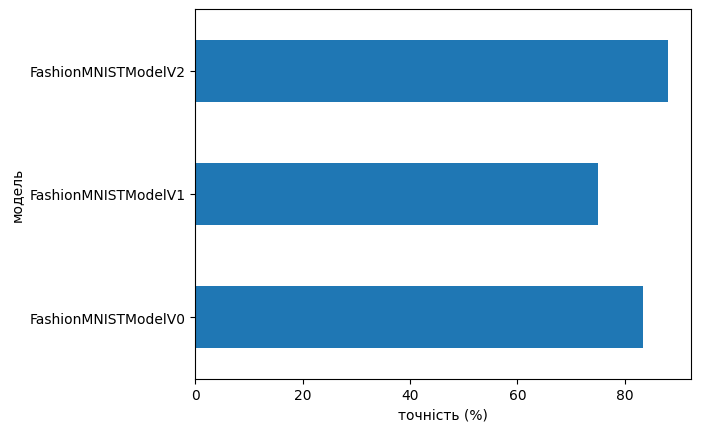

In [ ]:
# Візуалізуємо результати нашої моделі
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("точність (%)")
plt.ylabel("модель");

Важливий нюанс - це те, що нашаCNN ще й має МЕНШЕ параметрів за повнозвʼязні мережі!

In [ ]:
def count_model_parameters(model):
    """
    Функція для підрахунку загальної кількості параметрів та кількості тренувальних параметрів у моделі.

    Параметри:
        model (torch.nn.Module): PyTorch модель.

    Повертає:
        total_params (int): Загальна кількість параметрів у моделі.
        trainable_params (int): Кількість тренувальних (trainable) параметрів.
    """
    # Підрахунок загальної кількості параметрів
    total_params = sum(p.numel() for p in model.parameters())
    # Підрахунок кількості параметрів, які можуть бути натреновані (requires_grad=True)
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Загальна кількість параметрів: {total_params}")
    print(f"Кількість тренувальних параметрів: {trainable_params}")


In [ ]:
count_model_parameters(model_0)

Загальна кількість параметрів: 7960
Кількість тренувальних параметрів: 7960


In [ ]:
count_model_parameters(model_1)

Загальна кількість параметрів: 7960
Кількість тренувальних параметрів: 7960


In [ ]:
count_model_parameters(model_2)

Загальна кількість параметрів: 7740
Кількість тренувальних параметрів: 7740


## 9. Зробіть і оцініть випадкові прогнози з найкращою моделлю

Добре, ми порівняли наші моделі між собою, давайте далі оцінимо нашу найкращу модель, `model_2`.

Для цього давайте створимо функцію `make_predictions()`, куди ми зможемо передати модель і деякі дані для прогнозування.

In [ ]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Підготовка зразка
            sample = torch.unsqueeze(sample, dim=0).to(device) # Додати додатковий вимір і надіслати зразок на пристрій

            # Прямий прохід (модель видає сирий логіт)
            pred_logit = model(sample)

            # Отримати ймовірність прогнозу (логіт -> ймовірність прогнозу)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # зауваження: виконати softmax на вимірі "логітів", а не "пакетів" (в цьому випадку у нас розмір пакета 1, тому можна виконати на dim=0)

            # Отримати pred_prob з GPU для подальших обчислень
            pred_probs.append(pred_prob.cpu())

    # Об'єднати pred_probs, щоб перетворити список в тензор
    return torch.stack(pred_probs)


In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# Перегляньте форму першого тестового зразка та мітку
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")


Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [ ]:
# Зробіть прогнози на тестових зразках за допомогою моделі 2
pred_probs= make_predictions(model=model_2,
                             data=test_samples)

# Перегляньте перші два елементи списку ймовірностей прогнозів
pred_probs[:2]

tensor([[3.0072e-07, 1.1688e-07, 2.0475e-07, 5.2092e-07, 1.0904e-07, 9.9952e-01,
         1.1192e-06, 6.3413e-05, 1.1204e-04, 3.0494e-04],
        [2.7794e-02, 7.4017e-01, 7.8616e-04, 1.5280e-01, 4.8516e-02, 6.4818e-05,
         2.8522e-02, 3.6340e-04, 9.1539e-04, 6.9223e-05]])

А тепер ми можемо використати нашу функцію `make_predictions()`, щоб зробити прогнози на `test_samples`.

In [ ]:
# Зробіть прогнози на тестових зразках за допомогою моделі 2
pred_probs= make_predictions(model=model_2,
                             data=test_samples)

# Перегляньте перші два значення ймовірностей прогнозів
pred_probs[:2]

tensor([[3.0072e-07, 1.1688e-07, 2.0475e-07, 5.2092e-07, 1.0904e-07, 9.9952e-01,
         1.1192e-06, 6.3413e-05, 1.1204e-04, 3.0494e-04],
        [2.7794e-02, 7.4017e-01, 7.8616e-04, 1.5280e-01, 4.8516e-02, 6.4818e-05,
         2.8522e-02, 3.6340e-04, 9.1539e-04, 6.9223e-05]])

In [ ]:
import numpy as np

In [ ]:
np.argmax([0.1, 0.7, 0.2])

1

Чудово!

А тепер ми можемо перейти від ймовірностей прогнозування до міток прогнозування, взявши `torch.argmax()` з виходу функції активації `torch.softmax()`.

In [ ]:
# Перетворіть ймовірності прогнозів на мітки прогнозів, взявши argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [ ]:
# Чи мають наші прогнози таку ж форму, як і наші тестові мітки?
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]))

Тепер наші прогнозовані класи мають той же формат, що й наші тестові мітки, ми можемо порівняти.

Оскільки ми працюємо з зображеннями, давайте залишимося вірними девізу дослідника даних.

"Візуалізуйте, візуалізуйте, візуалізуйте!"

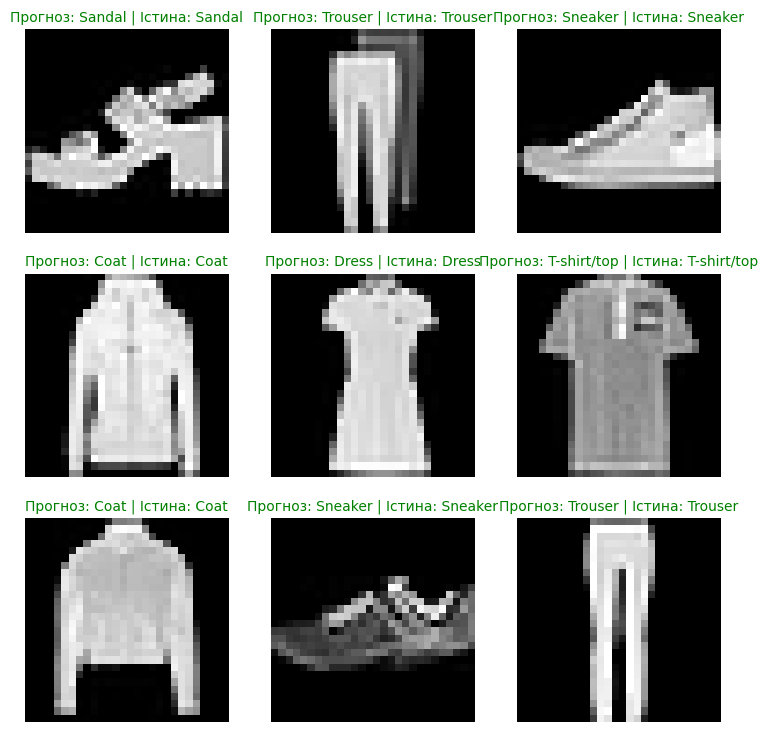

In [ ]:
# Побудова прогнозів
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Створити підграфік
  plt.subplot(nrows, ncols, i+1)

  # Побудувати цільове зображення
  plt.imshow(sample.squeeze(), cmap="gray")

  # Знайти мітку прогнозу (в текстовій формі, наприклад, "Сандалі")
  pred_label = class_names[pred_classes[i]]

  # Отримати істинну мітку (в текстовій формі, наприклад, "Футболка")
  truth_label = class_names[test_labels[i]]

  # Створити текст заголовка графіка
  title_text = f"Прогноз: {pred_label} | Істина: {truth_label}"

  # Перевірити на рівність і змінити колір заголовка відповідно
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # зелений текст, якщо правильно
  else:
      plt.title(title_text, fontsize=10, c="r") # червоний текст, якщо неправильно
  plt.axis(False);

Ну, ну, ну, хіба це не виглядає добре!

Не погано для кількох десятків рядків коду PyTorch!

## 10. Створення матриці плутанини для подальшої оцінки прогнозів

Існує багато [різних метрик оцінки](https://www.learnpytorch.io/02_pytorch_classification/#9-more-classification-evaluation-metrics), які ми можемо використовувати для задач класифікації.

Однією з найвізуальніших є [матриця плутанини](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/).

Матриця плутанини показує, де ваша модель класифікації заплуталася між прогнозами та справжніми мітками.

Щоб створити матрицю плутанини, ми пройдемо три етапи:
1. Зробіть прогнози за допомогою нашої навченої моделі, `model_2` (матриця плутанини порівнює прогнози зі справжніми мітками).
2. Створіть матрицю плутанини, використовуючи [`torchmetrics.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/latest/references/modules.html?highlight=confusion#confusionmatrix).
3. Побудуйте матрицю плутанини, використовуючи [`mlxtend.plotting.plot_confusion_matrix()`](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/).

Давайте почнемо з того, щоб зробити прогнози за допомогою нашої навченої моделі.

In [ ]:
# Імпортуємо tqdm для індикатора прогресу
from tqdm.auto import tqdm

# 1. Зробіть прогнози з навченою моделлю
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Зроблення прогнозів"):
    # Відправте дані та цілі на цільовий пристрій
    X, y = X.to(device), y.to(device)
    # Виконайте прямий прохід
    y_logit = model_2(X)
    # Перетворіть прогнози з логітів -> ймовірності прогнозів -> мітки прогнозів
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # зауваження: виконуйте softmax на вимірі "логітів", а не "пакету" (в даному випадку у нас розмір пакету 32, тому можна виконати на dim=1)
    # Помістіть прогнози на CPU для оцінки
    y_preds.append(y_pred.cpu())
# Об'єднайте список прогнозів в тензор
y_pred_tensor = torch.cat(y_preds)

Зроблення прогнозів:   0%|          | 0/313 [00:00<?, ?it/s]

Чудово!

Тепер, коли у нас є прогнози, давайте пройдемося по кроках 2 і 3:
2. Створіть матрицю плутанини, використовуючи [`torchmetrics.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/latest/references/modules.html?highlight=confusion#confusionmatrix).
3. Побудуйте матрицю плутанини, використовуючи [`mlxtend.plotting.plot_confusion_matrix()`](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/).

Спочатку нам потрібно переконатися, що у нас встановлені `torchmetrics` та `mlxtend` (ці дві бібліотеки допоможуть нам створити та візуалізувати матрицю плутанини).

> **Примітка:** Якщо ви використовуєте Google Colab, за замовчуванням встановлена версія `mlxtend` - 0.14.0 (станом на березень 2022 року), однак для параметрів функції `plot_confusion_matrix()`, які ми хочемо використовувати, нам потрібна версія 0.19.0 або вище.

In [ ]:
# Перевірте, чи існує torchmetrics, якщо ні, встановіть його
try:
    import torchmetrics, mlxtend
    print(f"mlxtend версія: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "версія mlxtend повинна бути 0.19.0 або вище"
except:
    !pip install -q torchmetrics -U mlxtend # <- Примітка: Якщо ви використовуєте Google Colab, це може вимагати перезапуску середовища виконання
    import torchmetrics, mlxtend
    print(f"mlxtend версія: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 71.3 MB/s eta 0:00:00
mlxtend версія: 0.23.3


Щоб побудувати матрицю плутанини, нам потрібно переконатися, що у нас є версія [`mlxtend`](http://rasbt.github.io/mlxtend/) 0.19.0 або вища.

In [ ]:
# Імпортуйте оновлену версію mlxtend
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # повинна бути версія 0.19.0 або вище

0.23.3


`torchmetrics` та `mlxtend` встановлені, давайте створимо матрицю плутанини!

Спочатку ми створимо екземпляр `torchmetrics.ConfusionMatrix`, вказавши, скільки класів ми маємо, встановивши `num_classes=len(class_names)`.

Потім ми створимо матрицю плутанини (в форматі тензора), передавши нашому екземпляру прогнози нашої моделі (`preds=y_pred_tensor`) та цілі (`target=test_data.targets`).

Нарешті, ми можемо побудувати нашу матрицю плутанини, використовуючи функцію `plot_confusion_matrix()` з `mlxtend.plotting`.

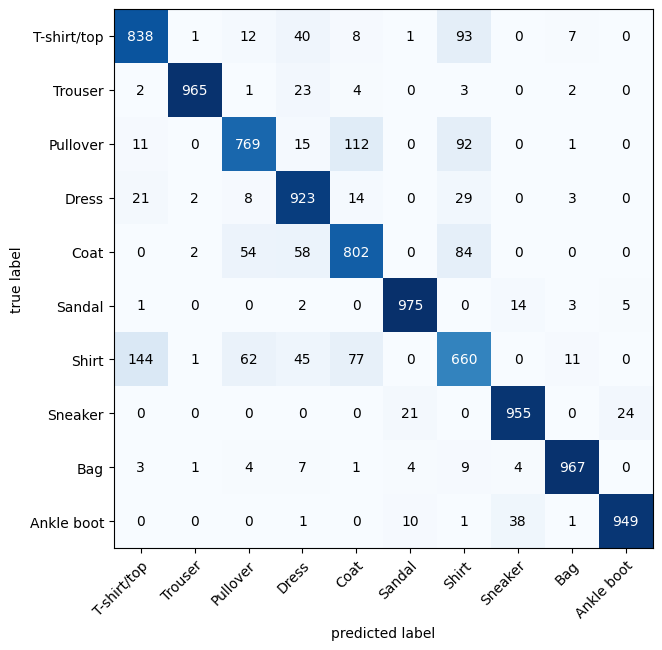

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Налаштування екземпляра матриці плутанини та порівняння прогнозів з цілями
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Побудова матриці плутанини
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib любить працювати з NumPy
    class_names=class_names, # перетворення міток рядків і стовпців на назви класів
    figsize=(10, 7)
);

Ого! Хіба це не виглядає добре?

Ми можемо бачити, що наша модель працює досить добре, оскільки більшість темних квадратів знаходяться по діагоналі з верхнього лівого кута до нижнього правого (ідеальна модель матиме лише значення в цих квадратах і 0 скрізь інде).

Модель найбільше "плутанина" на класах, які є схожими, наприклад, передбачаючи "Светр" для зображень, які насправді позначені як "Сорочка".

І те ж саме для передбачення "Сорочка" для класів, які насправді позначені як "Футболка/верх".

Ця інформація часто є більш корисною, ніж єдиний показник точності, оскільки вона показує *де* модель робить помилки.

Вона також натякає на *чому* модель може помилятися в певних випадках.

Цілком зрозуміло, що модель іноді передбачає "Сорочка" для зображень, позначених як "Футболка/верх".

Ми можемо використовувати цю інформацію для подальшого аналізу наших моделей і даних, щоб побачити, як їх можна покращити.

> **Завдання:** Використайте навчений `model_2` для прогнозування на тестовому наборі даних FashionMNIST. Потім побудуйте графік деяких прогнозів, де модель помилилася, поряд з тим, якою мала бути етикетка зображення. Після візуалізації цих прогнозів, як ви вважаєте, це більше помилка моделювання чи помилка даних? Чи може модель працювати краще, чи етикетки даних занадто близькі одна до одної (наприклад, етикетка "Сорочка" занадто близька до "Футболка/верх")?

## 11. Збереження та завантаження найкращої моделі

Давайте завершимо цей розділ, зберігши та завантаживши нашу найкращу модель.

Ми можемо зберігати та завантажувати модель PyTorch, використовуючи комбінацію:
* `torch.save` - функція для збереження цілого моделі PyTorch або `state_dict()` моделі.
* `torch.load` - функція для завантаження збереженого об'єкта PyTorch.
* `torch.nn.Module.load_state_dict()` - функція для завантаження збереженого `state_dict()` в існуючий екземпляр моделі.

Ви можете знайти більше інформації про ці три функції в [документації PyTorch щодо збереження та завантаження моделей](https://pytorch.org/tutorials/beginner/saving_loading_models.html).

На даний момент давайте збережемо `state_dict()` нашої `model_2`, а потім завантажимо його назад і оцінимо, щоб переконатися, що збереження та завантаження пройшли успішно.

In [ ]:
from pathlib import Path

# Створити директорію моделей (якщо вона ще не існує), див. https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # створити батьківські директорії, якщо потрібно
                 exist_ok=True # якщо директорія моделей вже існує, не викликати помилку
)

# Створити шлях для збереження моделі
MODEL_NAME = "pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Зберегти стан моделі
print(f"Збереження моделі за адресою: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # зберігаємо лише state_dict(), що зберігає навчені параметри
           f=MODEL_SAVE_PATH)

Збереження моделі за адресою: models/pytorch_computer_vision_model_2.pth


Тепер, коли у нас є збережена модель `state_dict()`, ми можемо завантажити її назад, використовуючи комбінацію `load_state_dict()` та `torch.load()`.

Оскільки ми використовуємо `load_state_dict()`, нам потрібно створити новий екземпляр `FashionMNISTModelV2()` з тими ж вхідними параметрами, що й у нашій збереженій моделі `state_dict()`.

In [ ]:
# Створіть новий екземпляр FashionMNISTModelV2 (такий самий клас, як наш збережений state_dict())
# Примітка: завантаження моделі викликатиме помилку, якщо форми тут не збігаються з збереженою версією
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                    hidden_units=10, # спробуйте змінити це на 128 і подивитися, що станеться
                                    output_shape=10)

# Завантажте збережений state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Відправте модель на GPU
loaded_model_2 = loaded_model_2.to(device)

<ipython-input-88-d82bf1f57138>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


А тепер, коли у нас є завантажена модель, ми можемо оцінити її за допомогою `eval_model()`, щоб переконатися, що її параметри працюють подібно до `model_2` перед збереженням.

In [ ]:
# Оцінка завантаженої моделі
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3251011371612549,
 'model_acc': 88.03913738019169}

Чи виглядають ці результати так само, як `model_2_results`?

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3251011371612549,
 'model_acc': 88.03913738019169}

Ми можемо дізнатися, чи два тензори близькі один до одного, використовуючи `torch.isclose()` і передаючи рівень допустимої близькості через параметри `atol` (абсолютна допустимість) та `rtol` (відносна допустимість).

Якщо результати нашої моделі близькі, вихід `torch.isclose()` повинен бути істинним.

In [ ]:
# Перевірте, чи результати близькі один до одного (якщо вони дуже далеко, може бути помилка)
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # абсолютна похибка
              rtol=0.0001) # відносна похибка

tensor(True)

# Що почитати додатково

1. Про історичний розвиток CNNів простою мовою: https://www.superannotate.com/blog/guide-to-convolutional-neural-networks

2. Детально як працює CNN з візуалізаціями і можливість поклікати власноруч і зрозуміти принципи роботи CNN ще глибше: https://poloclub.github.io/cnn-explainer/


